## KNN probability - classification threshold

#### Attribute Information

- STG (The degree of study time for goal object materails), (input value)
- SCG (The degree of repetition number of user for goal object materails) (input value) 
- STR (The degree of study time of user for related objects with goal object) (input value) 
- LPR (The exam performance of user for related objects with goal object) (input value) 
- PEG (The exam performance of user for goal objects) (input value) 
- UNS (The knowledge level of user) (target value) 
 - Very Low: 50 
 - Low:129 
 - Middle: 122 
 - High 130

In [125]:
% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

df = pd.read_csv('User_Knowledge.csv')

df.loc[df.UNS == 'very_low','grade'] = 0
df.loc[df.UNS == 'Low','grade'] = 1
df.loc[df.UNS == 'Middle','grade'] = 2
df.loc[df.UNS == 'High','grade'] = 3

df.loc[df.UNS == 'very_low','vlow'] = 1
df.loc[df.UNS == 'Low','low'] = 1
df.loc[df.UNS == 'Middle','mid'] = 1
df.loc[df.UNS == 'High','high'] = 1

df.fillna(0, inplace=True)
df.sample(5)

,STG,SCG,STR,LPR,PEG,UNS,grade,vlow,low,mid,high
191,0.420,0.700,0.72,0.30,0.80,High,3.0,0.0,0.0,0.0,1.0
165,0.400,0.330,0.12,0.30,0.90,High,3.0,0.0,0.0,0.0,1.0
170,0.420,0.360,0.63,0.04,0.25,Low,1.0,0.0,1.0,0.0,0.0
25,0.090,0.300,0.68,0.18,0.85,High,3.0,0.0,0.0,0.0,1.0
157,0.495,0.276,0.58,0.77,0.83,High,3.0,0.0,0.0,0.0,1.0


In [126]:
# defining different labels
y =df.grade
y1 = df.vlow
y2 = df.low
y3 = df.mid
y4 = df.high

# feature selection, dropping SCG
X = df.drop(columns=['SCG']).iloc[:,0:4]

X.sample()

,STG,STR,LPR,PEG
12,0.1,0.52,0.78,0.34


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y4, test_size=0.33, random_state=0)
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### KNN

##### Classifier implementing the k-nearest neighbors vote

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn_pca = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

print("KNN Classfier (y1)",knn.score(X_test,y_test))

KNN Classfier (y1) 0.988372093023


In [129]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

Text(0,0.5,'Frequency')

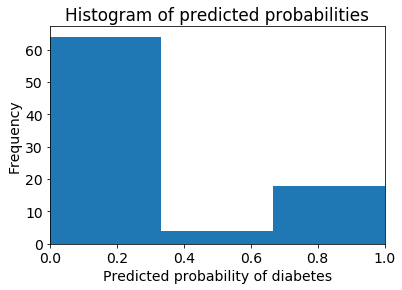

In [130]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=3)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [131]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)

from sklearn import metrics
print(metrics.confusion_matrix(y_test, np.reshape(y_pred_class,(-1,1))))

[[64  3]
 [ 0 19]]


### null accuracy

In [132]:
max(y_test.mean(), 1-y_test.mean())

0.7790697674418605

In [133]:
y_test.value_counts().head(1)/len(y_test)

0.0    0.77907
Name: high, dtype: float64

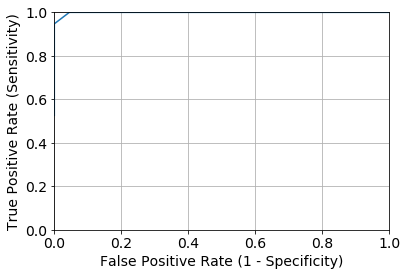

In [134]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)